                            PREDICTION DU CANCER DU SEIN 

=> Selection des variables importantes pour la prédiction

=> Apprentissage avec les modèles : Regression Logistique et Arbre de décision 

In [566]:
##----- Importation des modules utiles pour ce projet ----##

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')


                    IMPORTATION DES DONNEES

In [567]:
data = pd.read_csv("breast_cancer.csv", sep=",")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


                    PREMIERES OBSERVATIONS 

In [568]:
#----Informations sur les colonnes (types, valeurs nulles)----#

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

=> Toutes le variables du dataset sont numériques (id -> entier et le reste -> réel) sauf 'diagnostic' qui prend les valeurs 'M' ou 'B'

=> Outre 'Unnamed: 32' qui n'a pas de valeur, aucune variable ne contient des valeurs manquantes.

In [569]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


                    DEBUT DU NETTOYAGE

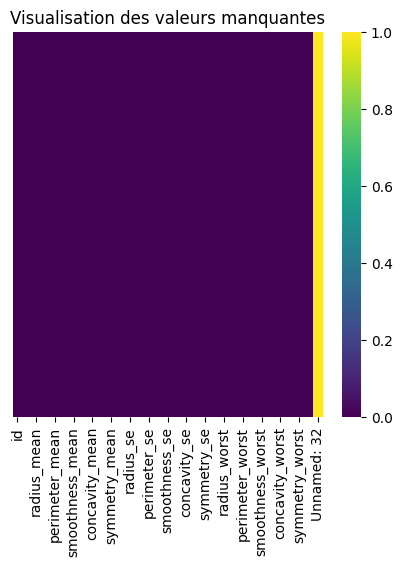

In [570]:
       ##--- Visualisation des valeurs manquantes ---##

plt.figure(figsize=(5, 5))
sns.heatmap(data.isnull(), cbar=True, cmap='viridis', yticklabels=False)

plt.title('Visualisation des valeurs manquantes')
plt.show()


Suppression des variables inutiles

In [571]:
data.drop(["Unnamed: 32", "id"], axis=1, inplace=True)
data.shape

(569, 31)

Visualisation de la distribution du diagnostic

diagnosis
B    357
M    212
Name: count, dtype: int64


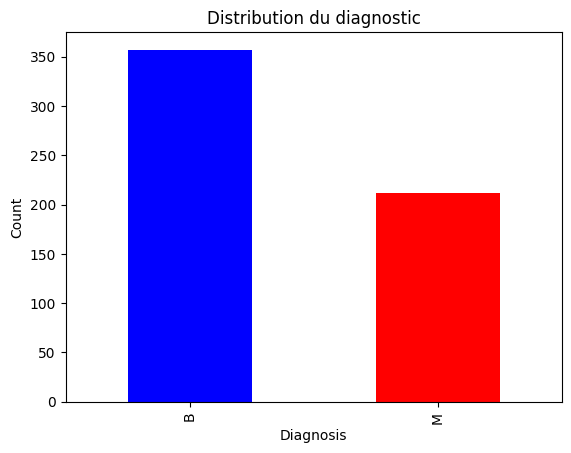

In [572]:
distribution = data['diagnosis'].value_counts()
print(distribution)

data["diagnosis"].value_counts().plot(kind="bar", color=['blue','red'])
plt.title("Distribution du diagnostic")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()


Encodage de la variable "diagnosis"

In [588]:
#data["diagnosis"] = data["diagnosis"].map({ "M": 1, "B": 0})
data["diagnosis"].head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

Corrélation entre les variables

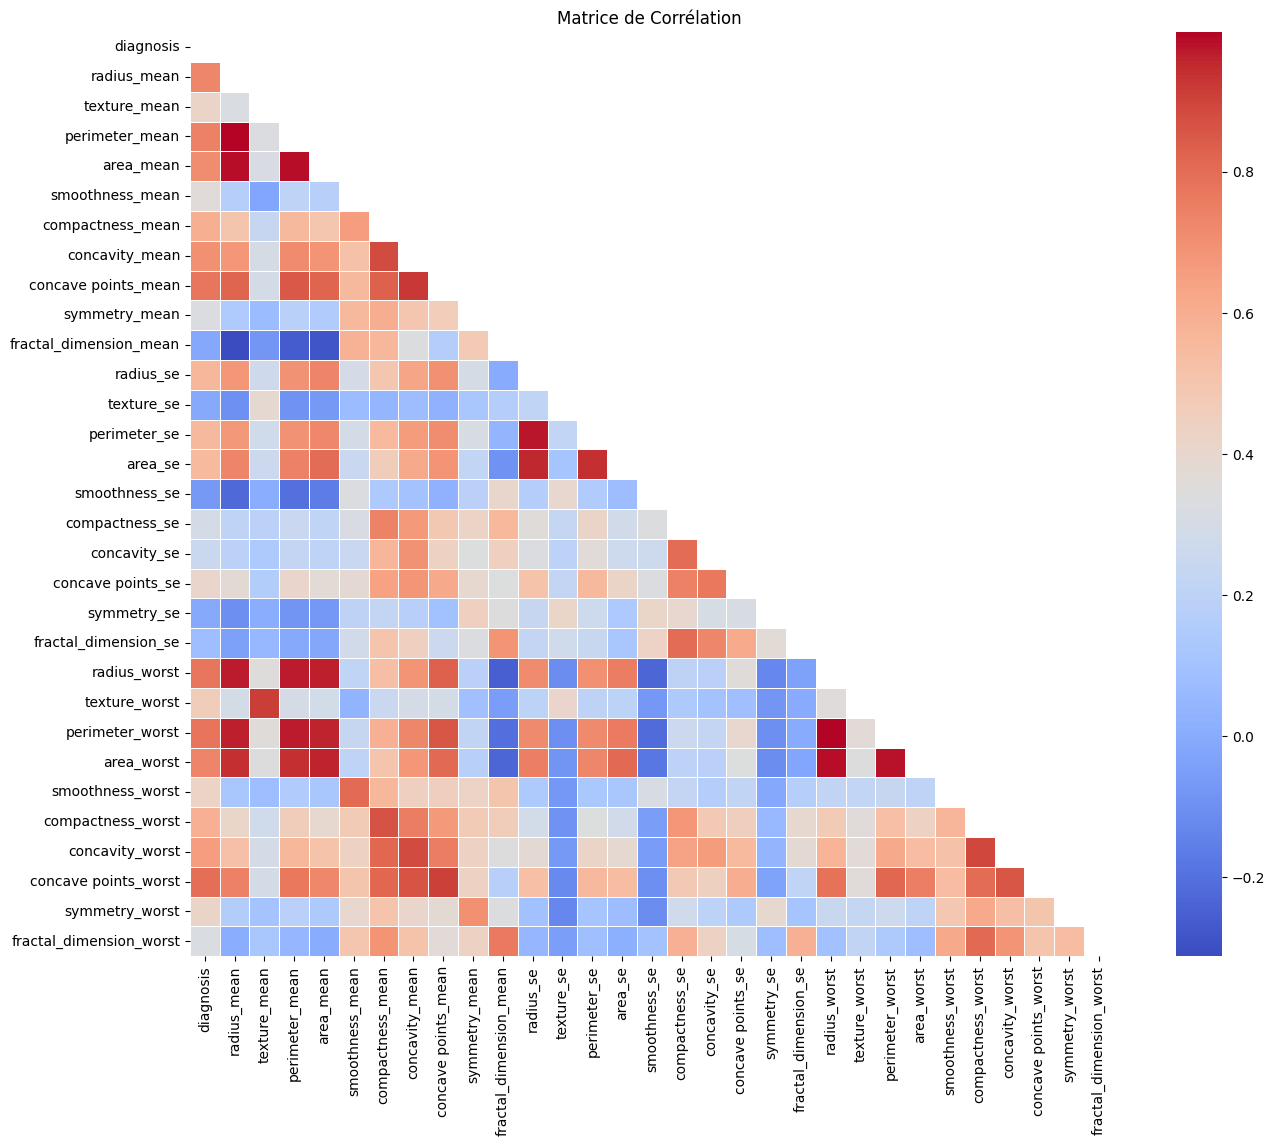

In [574]:
# Calcul de la matrice de corrélation
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Plot complet sans mask, avec annotations dans chaque case
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr,
    mask=mask,
    annot=False,        # active les annotations
    fmt='.2f',         # format à deux décimales
    cmap='coolwarm',   # palette de couleurs
    linewidths=0.5,    # séparations entre les cases
    square=True        # cases carrées
)
plt.title('Matrice de Corrélation ')
plt.show()

Separation variables explicatives/cible

In [575]:
X = data.drop("diagnosis", axis=1)
Y = data["diagnosis"]

Normalisation des variables explicatives

In [576]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Separation des donnees : entrainement/test

In [640]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42 )

Creation du modele logistique

In [650]:
model = LogisticRegression(
    penalty = 'l2',
    C=0.1,
    class_weight = None,
    max_iter = 100,
    multi_class = 'auto',
    solver = 'liblinear',
    random_state= 42,
    l1_ratio= 0.0
)

In [651]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'penalty': ['l2', 'l1', 'elasticnet'],         
#     'C': [0.001, 0.01, 0.1, 1, 10, 100] ,                
#     'solver': ['lbfgs', 'liblinear', 'saga', 'sag', 'newton-cg'],         
#     'max_iter': [100, 200],
#     'class_weight': [None, 'balanced', {0:1, 1:3}],
#     'random_state': [42, 26, 10],
#     'multi_class': ['auto', 'ovr', 'multinomial'],
#     'l1_ratio': [0.0, 0.5, 1.0]
# }
# model = LogisticRegression()
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, Y_train)

Entrainement du modele

In [652]:
model.fit(X_train, Y_train)

LogisticRegression(C=0.1, l1_ratio=0.0, multi_class='auto', random_state=42,
                   solver='liblinear')

Prediction 

In [653]:
#Y_pred = model.predict(X_test)

In [654]:
Y_prob = model.predict_proba(X_test)[:, 1]
optimal_threshold = 0.50  # À tester via courbe ROC
Y_pred = (Y_prob >= optimal_threshold).astype(int)
print("Adjusted Accuracy:", accuracy_score(Y_test, Y_pred))

Adjusted Accuracy: 0.9912280701754386


Matrice de confusion

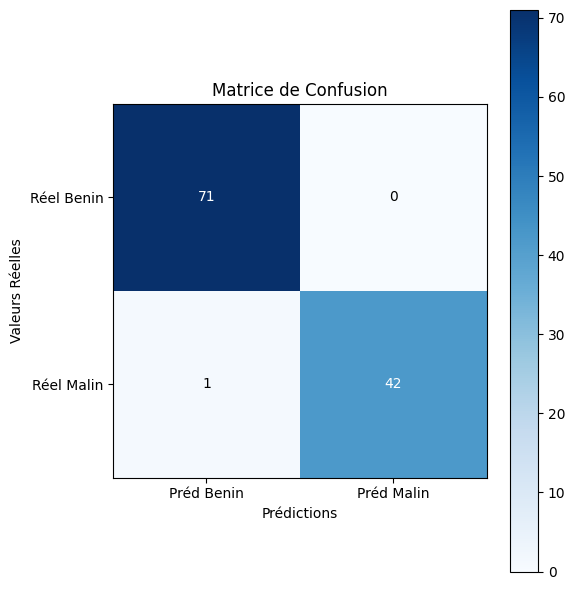

In [655]:
##---- Creation de la matrice ----##
cm = confusion_matrix(Y_test, Y_pred)

##---- Visualisation de la matrice ----##
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')

##---- Annotation des cellules avec les effectifs ----##
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i, j] > cm.max()/2 else "black")

##---- Labels et titres ----##
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Préd Benin', 'Préd Malin'])
ax.set_yticklabels(['Réel Benin', 'Réel Malin'])
ax.set_xlabel('Prédictions')
ax.set_ylabel('Valeurs Réelles')
ax.set_title('Matrice de Confusion')

##---- Colorbar ----##
fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

Evaluation du modele

Accuracy

In [656]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"{accuracy: .3f}")

 0.991


Rapport de classification

In [657]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



Courbe ROC et AUC

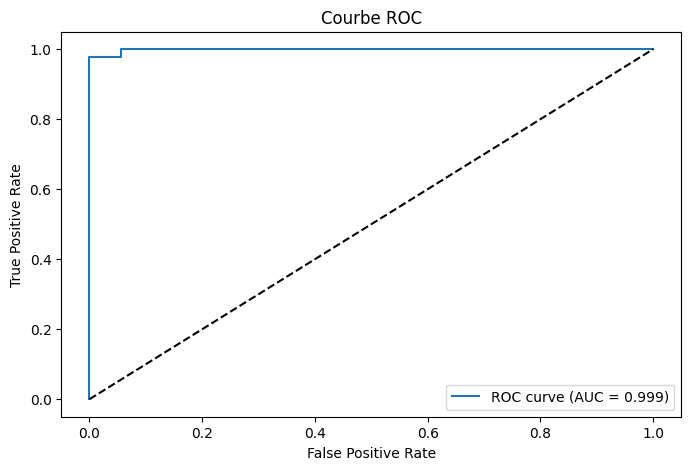

In [658]:
Y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5) )
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.3f})'.format(roc_auc))
plt.plot([0,1], [0,1], 'k--')  # Diagonale
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()